# 텍스트 머신러닝1

### 1. 문자열 데이터 타입 4가지

#### 범주형 데이터 (범주 많다면 범주형 데이터로서의 가치가 없어짐)

#### 임의의 문자열 (통제어휘 리스트)
(시소러스:우리나라는 발달x미국발달o 여러나라 모여있어서 발달함)

#### 구조화된 문자열

#### 텍스트 데이터 (틀x, 자유로운 형태)

In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
print(sklearn.__version__)

0.22.1


In [3]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

CPython 3.7.6
IPython 7.12.0

sklearn 0.0
numpy 1.18.1
scipy 1.4.1
matplotlib 3.1.3


In [22]:
from sklearn.datasets import load_files

reviews_train = load_files("D:/학교/4학년/빅데이터분석실습/7주차/sample/train")

#텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다
text_train, y_train=reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[1]:/n", text_train[1])

text_train의 타입: <class 'list'>
text_train의 길이: 903
text_train[1]:/n b"You have to admire Brad Sykes even if you don't particularly want to, a man who churns out budget horror after budget horror to less than enthusiastic receptions. But keeps on doing it all the same. Even the half-hearted praise than surrounds his Camp Blood films is given grudgingly and I'm as guilty of this as anyone. Brad normally manages to throw something interesting into the mix, a neat idea, a kooky character, whatever, but without the funds to take it further than base level, he relies on the audience to cut him some slack and appreciate it for what it is and what it could be. Joe Haggerty gives a spirited and very funny performance as Ebenezer Jackson and its a credit to Sykes that he can sense that this oddball turn is going to work within the framework of the film. Coming to a multiplex near you, in a parallel universe, somewhere."


In [23]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [24]:
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [301 301 301]


In [41]:
reviews_test = load_files("D:/학교/4학년/빅데이터분석실습/7주차/sample/test")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수:", len(text_test))
print("클래스별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br  />", b"") for doc in text_test]

테스트 데이터의 문서 수: 602
클래스별 샘플 수 (테스트 데이터): [301 301]


### 2. 텍스트 데이터를 BOW로 표현하기
1. 토큰화
2. 어휘 사전 구축
3. 인코딩

In [25]:
bards_words = ["the fooldoth think he is wise,",
               "but the wise man knows himself to be a fool"]

#### CounterVectorizer 함수를 이용하여 BOW구현

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [27]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:/n", vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:/n {'the': 9, 'fooldoth': 3, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0, 'fool': 2}


In [28]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))


BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>


In [29]:
print("BOW의 밀집 표현:/n", bag_of_words.toarray())

BOW의 밀집 표현:/n [[0 0 0 1 1 0 1 0 0 1 1 0 1]
 [1 1 1 0 0 1 0 1 1 1 0 1 1]]


##### bards_words 각각 문자열은 모두 다른 단어로 구성되어 0개이거나 1개

#### 영화 리뷰에 대한 BOW
감성분석 적용

In [30]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:/n", repr(X_train))

X_train:/n <903x12128 sparse matrix of type '<class 'numpy.int64'>'
	with 118363 stored elements in Compressed Sparse Row format>


#### get_feature_names 메서드는 각 피처 변수 에 해당하는 단어를 리스트로 반환

In [31]:
feature_names = vect.get_feature_names()
print("피처 개수:", len(feature_names))
print("처음 20개의 피처:/n", feature_names[:20])
print("10010에서 10030까지의 피처:/n", feature_names[10010:10030])
print("매 1000번째 피처:/n", feature_names[::1000])

피처 개수: 12128
처음 20개의 피처:/n ['00', '000', '00pm', '04', '06', '08', '10', '100', '1000', '105', '10th', '11', '112', '12', '120', '123', '13', '130', '134', '13th']
10010에서 10030까지의 피처:/n ['spare', 'spared', 'spark', 'sparked', 'sparkles', 'sparkling', 'sparring', 'sparse', 'spartacus', 'spawn', 'spawned', 'speak', 'speaker', 'speakers', 'speaking', 'speaks', 'spears', 'special', 'specializes', 'specially']
매 1000번째 피처:/n ['00', 'bargain', 'class', 'devour', 'faulty', 'headlines', 'kik', 'morgue', 'plant', 'revolving', 'sow', 'tongue', 'worldwide']


#### 분류기의 성능 수치 계산

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=10000), X_train, y_train, cv=5)
print("교차 검증 평균 점수:{:.2f}".format(np.mean(scores)))


교차 검증 평균 점수:0.33


#### 교차 검증 평균 점수로 82% 는 괜찮은 이진 분류 성능이다(강의)

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수:{:.2f}".format(grid.best_score_))
print("최적의 매개변수:", grid.best_params_)

최상의 교차 검증 점수:0.34
최적의 매개변수: {'C': 0.01}


In [42]:
X_test = vect.transform(text_test)
print("테스트 점수:{:.2f}".format(grid.score(X_test, y_test)))


테스트 점수:0.14


In [43]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <903x3433 sparse matrix of type '<class 'numpy.int64'>'
	with 101055 stored elements in Compressed Sparse Row format>


In [44]:
feature_names = vect.get_feature_names()

print("처음 50개의 특성:/n", feature_names[:50])
print("20010에서 20030까지의 특성:/n", feature_names[20010:20030])
print("매 700번째 특성:/n", feature_names[::700])

처음 50개의 특성:/n ['000', '08', '10', '100', '11', '12', '13', '13th', '15', '18', '1946', '1955', '1970', '1978', '1996', '1998', '1999', '1st', '20', '2003', '25', '30', '3d', '40', '45', '50', '60', '70', '70s', '75', '80', '80s', '90', '99', 'aapke', 'abiding', 'ability', 'able', 'abo', 'about', 'above', 'abruptly', 'absolute', 'absolutely', 'absurd', 'abuse', 'abusive', 'academy', 'accent', 'accept']
20010에서 20030까지의 특성:/n []
매 700번째 특성:/n ['000', 'couple', 'hated', 'opener', 'sports']


In [46]:
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)

grid.fit(X_train, y_train)
print("최적의 교차 검증 점수:{:.2f}".format(grid.best_score_))

최적의 교차 검증 점수:0.34


### 3. 불용어 리스트
의미없는 단어 제거

In [47]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:/n",list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:/n ['already', 'and', 'anyway', 'will', 'eight', 'hereby', 'my', 'then', 'thru', 'yet', 'nobody', 'me', 'always', 'system', 'well', 'towards', 'thereupon', 'six', 'his', 'interest', 'rather', 'noone', 'un', 'nothing', 'amongst', 'thereafter', 'yourself', 'an', 'where', 'behind', 'after', 'whatever']


In [48]:
#stop_words="english"라고 지정하면 내장된 불용어를 사용합니다
#내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:/n", repr(X_train))

불용어가 제거된 X_train:/n <903x3166 sparse matrix of type '<class 'numpy.int64'>'
	with 58612 stored elements in Compressed Sparse Row format>


In [49]:
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수:{:.2f}".format(grid.best_score_))

최상의 교차 검증 점수:0.36


### 4. 역문헌 빈도(tf-idf)
말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법
한단어가 특정 문서에 자주 나타나고 다른 여러 문서에서는 그렇지 않다면, 그 문서의 내용을 아주 잘 설명하는 단어라고 볼 수 있습니다

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=10000))
param_grid = {'logisticregression__C':[0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수:{:.2f}".format(grid.best_score_))

최상의 교차 검증 점수:0.38


In [51]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
#훈련 데이터셋을 변환합니다
X_train = vectorizer.transform(text_train)
#특성별로 가장 큰 값을 찾습니다
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
#특성이름을 구합니다
feature_names = np.array(vectorizer.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:/n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성:/n", feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:/n ['empty' 'quips' 'observe' 'jungles' 'drags' 'arrogant' 'redundant'
 'birth' 'fancy' 'infamous' 'blow' 'discovery' 'draw' 'table' 'attack'
 'complicate' 'letting' 'prevent' 'dislike' 'fifty']
가장 높은 tfidf를 가진 특성:/n ['season' 'ringu' 'paul' 'family' 'children' 'sadako' 'ball' 'steve'
 'beyond' 'book' 'leon' 'office' '3d' 'ring' 'choose' 'foreign' 'jed'
 'nikita' 'jill' 'match']


In [52]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:/n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:/n ['the' 'and' 'to' 'of' 'this' 'it' 'in' 'is' 'that' 'but' 'for' 'with'
 'was' 'on' 'movie' 'as' 'not' 'be' 'film' 'are' 'you' 'one' 'have' 'at'
 'all' 'by' 'so' 'from' 'an' 'like' 'who' 'just' 'they' 'there' 'if' 'or'
 'out' 'about' 'some' 'has' 'can' 'his' 'he' 'good' 'what' 'when' 'up'
 'even' 'only' 'very' 'more' 'her' 'no' 'time' 'story' 'would' 'see' 'had'
 'been' 'my' 'me' 'which' 'much' 'because' 'do' 'really' 'don' 'were'
 'than' 'made' 'their' 'bad' 'make' 'plot' 'how' 'into' 'get' 'could'
 'any' 'acting' 'well' 'then' 'after' 'too' 'first' 'way' 'other' 'we'
 'also' 'will' 'people' 'she' 'watch' 'character' 'off' 'over' 'many'
 'life' 'two' 'movies']


### 모델 계수 조사

In [53]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[ 5.62937784e-05,  1.02734840e-04,  2.92303470e-05, ...,
         7.07492780e-04,  2.19674644e-04,  3.24278960e-05],
       [ 5.62937784e-05,  1.02734840e-04,  2.92303470e-05, ...,
         7.07492780e-04,  2.19674644e-04,  3.24278960e-05],
       [-1.12587557e-04, -2.05469681e-04, -5.84606940e-05, ...,
        -1.41498556e-03, -4.39349289e-04, -6.48557921e-05]])

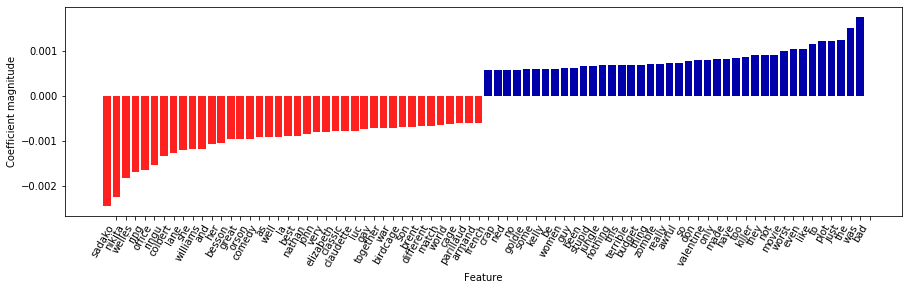

In [54]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features=40)

### 5. n-그램 BOW

In [55]:
print("bards_words:/n", bards_words)

bards_words:/n ['the fooldoth think he is wise,', 'but the wise man knows himself to be a fool']


In [56]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:/n", cv.get_feature_names())

어휘 사전 크기: 13
어휘 사전:/n ['be', 'but', 'fool', 'fooldoth', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [57]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:/n", cv.get_feature_names())

어휘 사전 크기: 13
어휘 사전:/n ['be fool', 'but the', 'fooldoth think', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fooldoth', 'the wise', 'think he', 'to be', 'wise man']


In [58]:
print("변환된 데이터(밀집 배열):/n", cv.transform(bards_words).toarray())

변환된 데이터(밀집 배열):/n [[0 0 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 1 0 1 1 0 1 0 1 1]]


In [59]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:/n", cv.get_feature_names())

어휘 사전 크기: 37
어휘 사전:/n ['be', 'be fool', 'but', 'but the', 'but the wise', 'fool', 'fooldoth', 'fooldoth think', 'fooldoth think he', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fooldoth', 'the fooldoth think', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [64]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=10000))
#매개변수 조합이 많고 트라이그램이 포함되어 있기 떄문에
#그리드 서치 실행에 시간이 오래 걸립니다
param_grid = {'logisticregression__C':[0.001, 0.01, 0.1, 1, 10,100],
              "tfidfvectorizer__ngram_range": [(1,1), (1,2), (1,3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 크로스 배리데이션 점수:{:.2f}".format(grid.best_score_))
print("최적의 매개변수:/n", grid.best_params_)


최상의 크로스 배리데이션 점수:0.38
최적의 매개변수:/n {'logisticregression__C': 0.001, 'tfidfvectorizer__ngram_range': (1, 1)}


In [65]:
#그리드 서치에서 테스트 점수를 추출합니다
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T

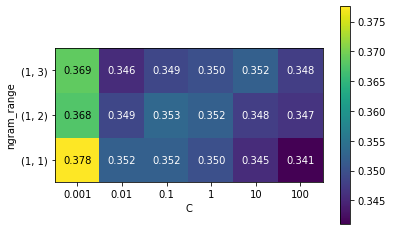

In [67]:
#히트맵을 그립니다
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

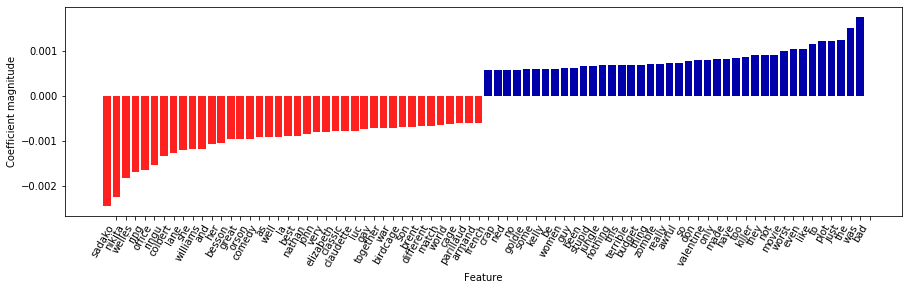

In [81]:
#특성 이름과 계수를 추출합니다
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feaure_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps["logisticregression"].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)
#plt.ylim(-22, 22)

### 6. 어간 추출과 표제어 추출

In [43]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [44]:
import spacy
print("spacy 버전", spacy.__version__)
import nltk
print("nltk 버전", nltk.__version__)

spacy 버전 2.2.4
nltk 버전 3.4.5


In [45]:
import spacy
import en_core_web_sm
#spacy의 영어 모델을 로드합니다
nlp = en_core_web_sm.load()
import nltk

#nltk의 PorterStemmer 객체를 만듭니다
stemmer = nltk.stem.PorterStemmer()

#spacy의 표제어 추출과 nltk의 어간 추출을 비교하는 함수입니다
def compare_normalization(doc):
    #spacy로 문서를 토큰화합니다
    doc_spacy = nlp(doc)
    #spacy로 찾은 표제어를 출력합니다
    print("표제어:")
    print([token.lemma_ for token in doc_spacy])
    
    #PorterStemmer로 찾은 토큰을 출력합니다
    print("어간:")
    print([stemmer.stem(token.norm_.lower())for token in doc_spacy])

In [46]:
compare_normalization(u"Our meeting today was worse than yesterday,"
                      "I'm scared of meeting the clients tomorrow.")

표제어:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', "I'm", 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', "i'm", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
